# Exercício 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image


import matplotlib.style as style 

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 7, 5
plt.rcParams['text.usetex'] = True

### Defining the sinusoidal function

Sampling period: 0.0010 s, sampling frequency: 1000.00 Hz
Sine frequency: 80 Hz


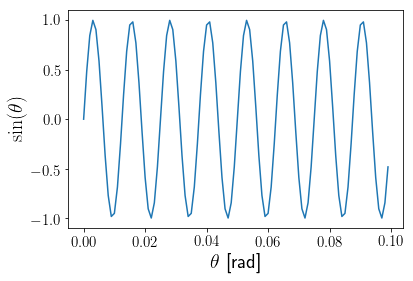

In [44]:
# sampling rate
fs = 1000;  
# sampling interval
Ts = 1.0/fs; 
# time vector
pts = np.arange(start=0, stop=np.pi/2, step=Ts)
num_pts = len(pts)
print(f'Sampling period: {Ts:.4f} s, sampling frequency: {fs:.2f} Hz')

# Sine frequency
f = 80
print(f'Sine frequency: {f} Hz')
# Sinusoidal function
s = np.sin(2*np.pi*f*pts)

pts_plot = np.arange(start=0, stop=0.1, step=Ts)

# Plotting
plt.plot(pts_plot, s[:(len(pts_plot))])
plt.xlabel(r'$\theta$~[rad]')
plt.ylabel(r'$\sin(\theta)$')
plt.axis('tight')
plt.savefig('sine.eps', transparent=True, optimize=True, bbox_inches='tight')
plt.show()


### Defining the Gaussian noise

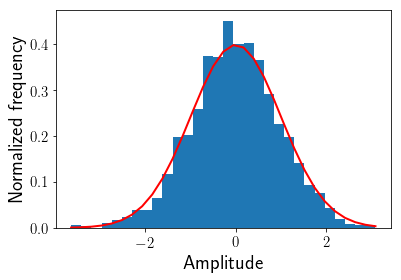

In [7]:
# Defining mean and standard deviation
mu, sigma = 0, 1
# Defing noise
n = np.random.normal(mu, sigma, num_pts)

# Plotting (what should be a Normal Distribution) histogram
count, bins, ignored = plt.hist(n, 30, density=True)
# Comparing with normal curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.xlabel('Amplitude')
plt.ylabel('Normalized frequency')
plt.axis('tight')
plt.grid(False)
plt.savefig('gaussian_noise.eps', transparent=True, optimize=True, bbox_inches='tight')
plt.show()

### Adding noise to sine function

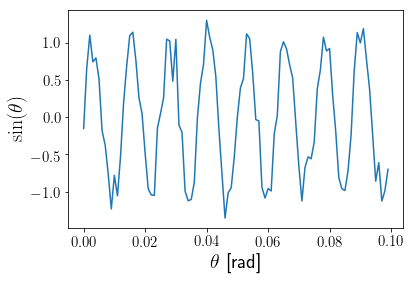

In [45]:
# Noise gain
k = 0.2

# Adding noise to sine
x = s + k*n

# Plotting
plt.plot(pts_plot, x[:(len(pts_plot))])
plt.xlabel(r'$\theta$~[rad]')
plt.ylabel(r'$\sin(\theta)$')
plt.axis('tight')
plt.savefig('sine_and_noise.eps', transparent=True, optimize=True, bbox_inches='tight')
plt.show()

### Estimating sine frequency from DFT plot

Estimated frequency: 80.20 Hz


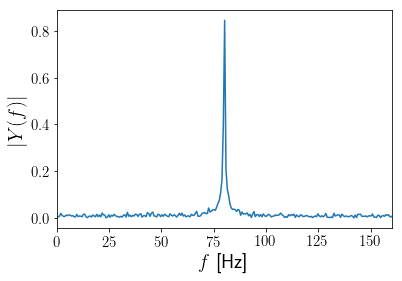

In [46]:
k = np.arange(num_pts)

T = num_pts/fs
frq = k/T 

# One side frequency range
num_pts_half = int(num_pts/2)
frq = frq[range(num_pts_half)]

# FFT computing and normalization
X = np.fft.fft(x)/num_pts_half
X = X[range(num_pts_half)]

# Plotting the spectrum
plt.xlim(left=0, right=160)
plt.plot(frq, abs(X)) 
plt.xlabel(r'$f$~[Hz]')
plt.ylabel(r'$|Y(f)|$')
plt.savefig('dft.eps', transparent=True, optimize=True, bbox_inches='tight')

argmax = np.argmax(np.absolute(X))
estimated_freq = frq[argmax]
print(f'Estimated frequency: {estimated_freq:.2f} Hz')

## GIF showing noise gain and estimated frequency relation

![atualizada](abs.gif "atualizada")

## Recovering signal with low SNR

The sine function and Gaussian noise are both time and frequency entangled, per say, so we have to use another way to separate them. My idea is using autocorrelation. Let's see.

### Defining a signal with low SNR

In [ ]:
# Noise gain
k = 0.1

# Adding noise to sine
x = s + k*n

# Plotting
plt.plot(pts, x)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

k = np.arange(num_pts)

T = num_pts/fs
frq = k/T 

# One side frequency range
num_pts_half = int(num_pts/2)
frq = frq[range(num_pts_half)]

# FFT computing and normalization
X = np.fft.fft(x)/num_pts_half
X = X[range(num_pts_half)]

# Plotting the spectrum
plt.plot(frq, abs(X)) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(freq)|')

In [ ]:
argmax = np.argmax(np.absolute(X))
estimated_freq = frq[argmax]
print(f'Estimated frequency: {estimated_freq:.2f} Hz')

We saw that our methods of looking for the peak value of |X| fails.

In [ ]:
result = np.correlate(x, x, mode='full')
result_size = int(result.size/2)
ac = result[result_size:]

# Plotting
T = num_pts/fs
frq = k/T 

# plt.plot(frq, ac)
# plt.axis('tight')
# plt.show()

# Exercício 2

# Linear Convolution

In [47]:
x = np.array([1, 2])
h = np.array([1, 0])

## It's time time

### Sanity check using numpy convolve

In [48]:
conv = np.convolve(x, h)
print(f'Convolution using numpy convolve result: {conv}')

Convolution using numpy convolve result: [1 2 0]


### Forming my own convolution matrix

In [49]:
from scipy.linalg import toeplitz

N = len(h)
M = len(x) 
num_out  = N + M - 1

rowToe = np.append(x[0], np.zeros((1, num_out - M)))
colToe = np.append(x, np.zeros((num_out - M, 1)))
bigX = toeplitz(colToe,rowToe);

print('My convolution matrix')
print(bigX)

My convolution matrix
[[1. 0.]
 [2. 1.]
 [0. 2.]]


In [28]:
h.shape = (len(h),1)
d
y = np.dot(bigX, h)
print(f'Convolution with my own Toeplitz matrix result: {y.transpose()}')

Convolution with my own Toeplitz matrix result: [[1. 2. 0.]]


In [29]:
print("Let's check if the results are the same.")
print(f'It is {(y.transpose() == conv).all()}, they are the same.')

Let's check if the results are the same.
It is True, they are the same.


## It's frequency time

In [50]:
# Defining the vectors
x = np.array([1, 2])
h = np.array([1, 0])

### ---> Doing things my way: the wrong way

### Sanity check using scipy fftconvolve

In [52]:
from scipy import signal as sg
conv = sg.fftconvolve(x, h, mode='same')
print(f'Convolution result: {conv

Convolution result: [1. 2.]


In [53]:
from scipy.linalg import dft

print(dft(len(x)))

X = dft(len(x)).dot(x)
print('This is the DFT of x:')
print(X)

print('\n')

H = dft(len(h)).dot(h)
print('This is the DFT o h:')
print(H)

Y = H*X
print('Multiplying them, look at that result:')
print(Y)

[[ 1.+0.j  1.+0.j]
 [ 1.+0.j -1.-0.j]]
This is the DFT of x:
[ 3.+0.j -1.-0.j]


This is the DFT o h:
[1.+0.j 1.+0.j]
Multiplying them, look at that result:
[ 3.+0.j -1.-0.j]


In [55]:
from numpy.linalg import inv

# Forming the inverse DFT matrix of Y
W_y = dft(len(Y))
print(W_y)
invW_y = inv(W_y)
print(invW_y)

# Post multiplying to back Y to time domain
y = np.dot(Y, invW_y)
# Only showing the real part because the imaginary part is zero
y = y.real
print(f'Convolution result: {y}')

[[ 1.+0.j  1.+0.j]
 [ 1.+0.j -1.-0.j]]
[[ 0.5+0.j  0.5-0.j]
 [ 0.5-0.j -0.5+0.j]]
Convolution result: [1. 2.]


### ---> Doing things the right way

The right way (zero-padding to obtain linear convolution)

In [37]:
conv = sg.fftconvolve(x, h, mode='full')

# Setting the print options to show nicer-looking output
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

print(f'Convolution result: {conv}')

Convolution result: [1. 2. 0.]


In [38]:
len_h = len(h)
len_x = len(x) 
num_out  = len_h + len_x - 1

x_zp = np.append(x, np.zeros((1, num_out - len_x)))
h_zp = np.append(h, np.zeros((1, num_out - len_h)))

In [56]:
print(dft(len(x_zp)))
X = dft(len(x_zp)).dot(x_zp)
print('This is the DFT of x:')
print(X)

print('\n')

H = dft(len(h_zp)).dot(h_zp)
print('This is the DFT o h:')
print(H)

print('\n')


Y = H*X
print('I am multiplying them, look at that result:')
print(Y)

[[ 1. +0.j     1. +0.j     1. +0.j   ]
 [ 1. +0.j    -0.5-0.866j -0.5+0.866j]
 [ 1. +0.j    -0.5+0.866j -0.5-0.866j]]
This is the DFT of x:
[ 3.+0.j      0.-1.7321j -0.+1.7321j]


This is the DFT o h:
[1.+0.j 1.+0.j 1.+0.j]


I am multiplying them, look at that result:
[ 3.+0.j      0.-1.7321j -0.+1.7321j]


In [57]:
# Forming the inverse DFT matrix of Y
W_y = dft(len(Y))
invW_y = inv(W_y)
print(invW_y)
# Post multiplying to back Y to time domain
y = np.dot(Y, invW_y)
# Only showing y real part because the imaginary part is zero (cleaner output)
y = y.real

print(f"Convolution result: {y}")

[[ 0.3333+0.j      0.3333+0.j      0.3333-0.j    ]
 [ 0.3333+0.j     -0.1667+0.2887j -0.1667-0.2887j]
 [ 0.3333-0.j     -0.1667-0.2887j -0.1667+0.2887j]]
Convolution result: [1. 2. 0.]
